In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.notebook import display

plt.style.use('default')
sns.set(font_scale=1.1)

In [7]:
df = pd.read_csv('heart.csv')

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
# Basic info about row, column and datatype
print('Shape',df.shape)
print('Info')
print(df.info())


Shape (918, 12)
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [33]:
# Discriptive statistics for numerical columns
print('Describe')
print(df.describe().T)

Describe
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


In [37]:
# Define Target and Feature Types
# (HeartDisease)-> Target
# (Others)->Features
target_cols = 'HeartDisease'
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']
categorical_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
target_cols,numeric_cols,categorical_cols

('HeartDisease',
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'],
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [38]:
# Check Missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [45]:
# Basic value range
df[numeric_cols].agg(['min','max','std','mean','median']).T

,min,max,std,mean,median
Age,28.0,77.0,9.432617,53.510893,54.0
RestingBP,0.0,200.0,18.514154,132.396514,130.0
Cholesterol,0.0,603.0,109.384145,198.799564,223.0
FastingBS,0.0,1.0,0.423046,0.233115,0.0
MaxHR,60.0,202.0,25.460334,136.809368,138.0
Oldpeak,-2.6,6.2,1.066570,0.887364,0.6


In [46]:
for c in categorical_cols:
    print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


##### Understanding distribution using Histogram and Boxplot

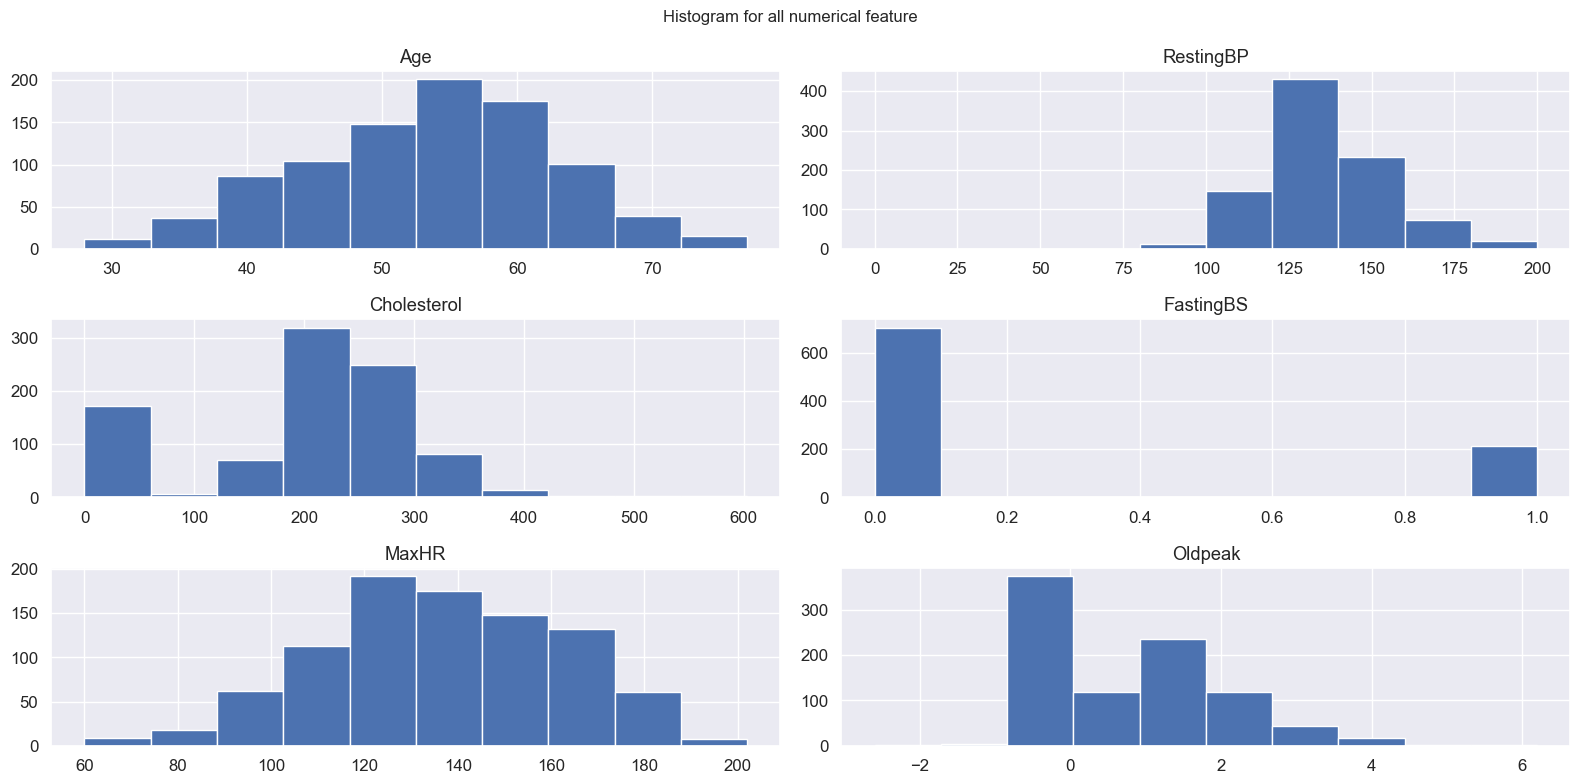

In [79]:
# Histogram for numeric columns
df[numeric_cols].hist(bins=10,figsize=(16,8))
plt.suptitle('Histogram for all numerical feature',fontsize = 12)
plt.tight_layout()
plt.show()

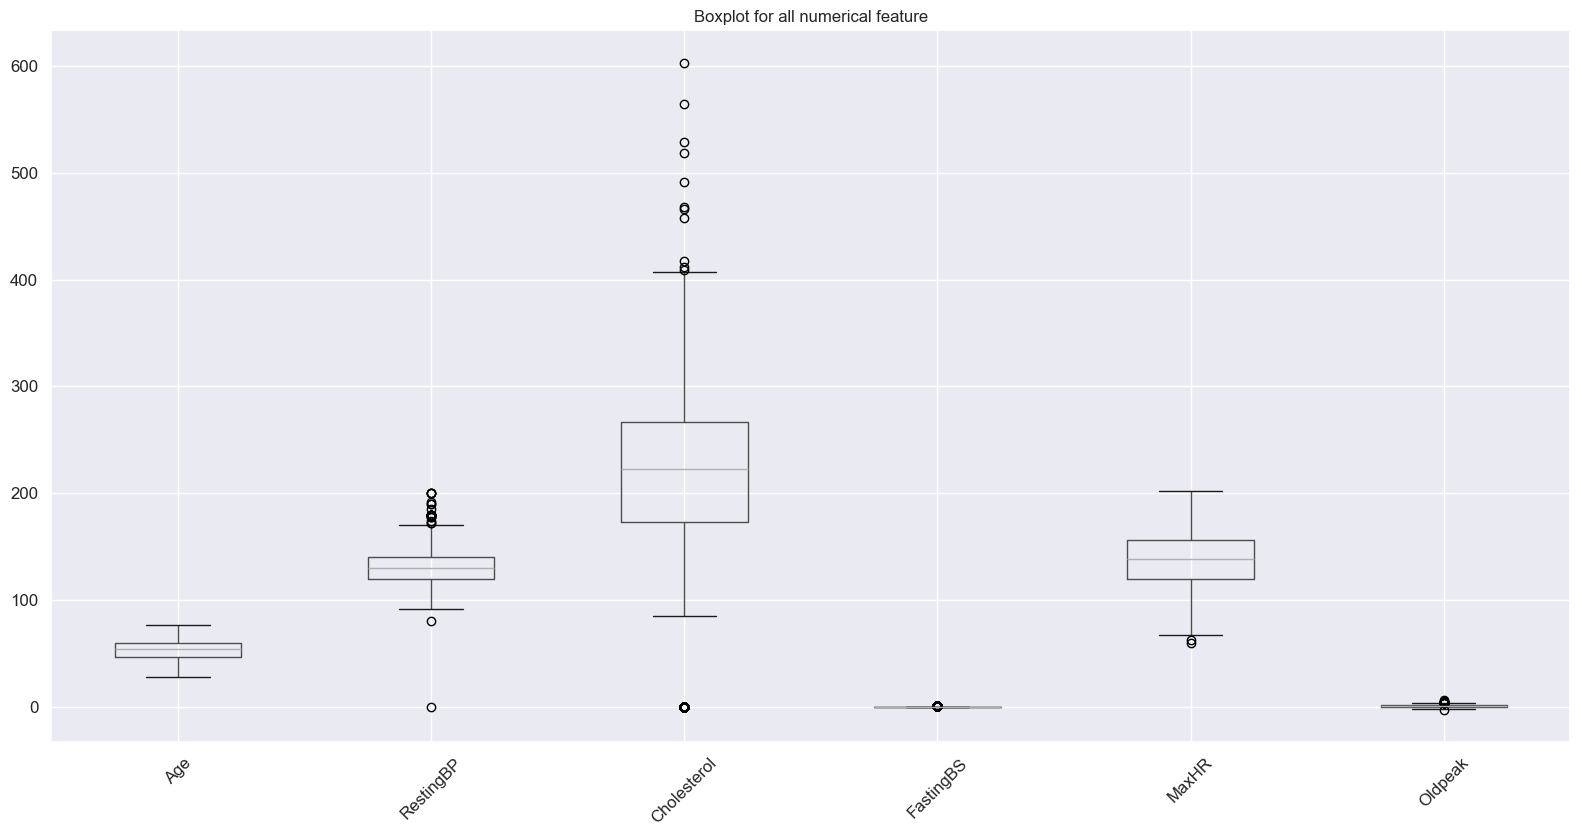

In [73]:
# Boxplot for numeric columns
df[numeric_cols].boxplot(figsize=(16,8))
plt.title('Boxplot for all numerical feature',fontsize = 12)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

##### Target variable distribution

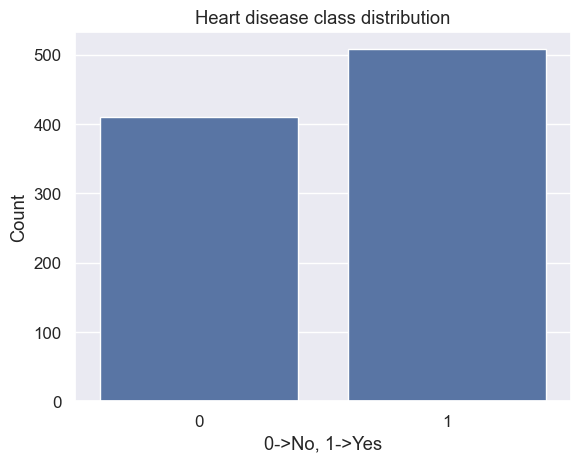

In [78]:
sns.countplot(x=df[target_cols])
plt.title('Heart disease class distribution')
plt.xlabel('0->No, 1->Yes')
plt.ylabel('Count')
plt.show()

##### Categorical Features exploration

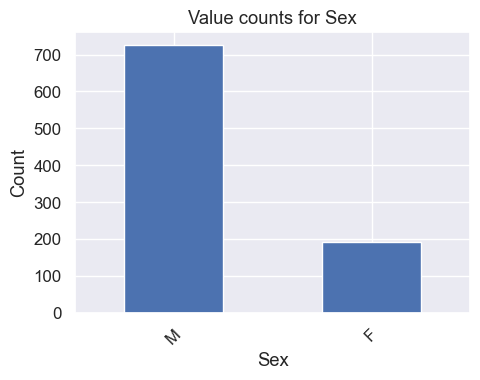

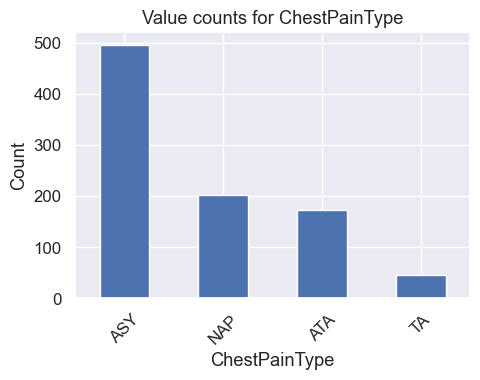

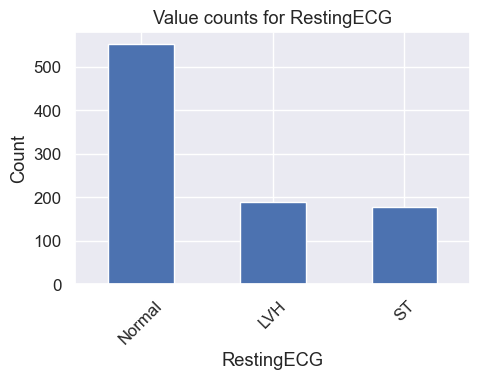

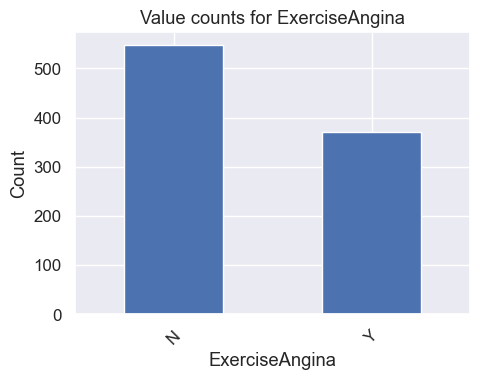

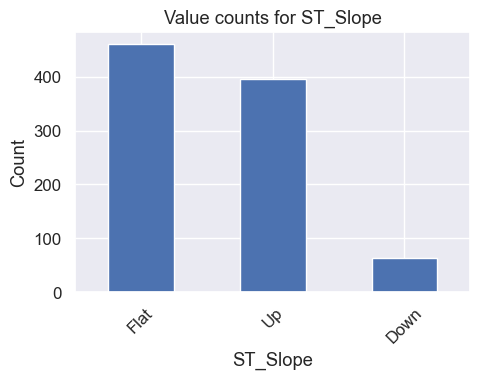

In [91]:
for c in categorical_cols:
    plt.figure(figsize = (5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title(f"Value counts for {c}")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

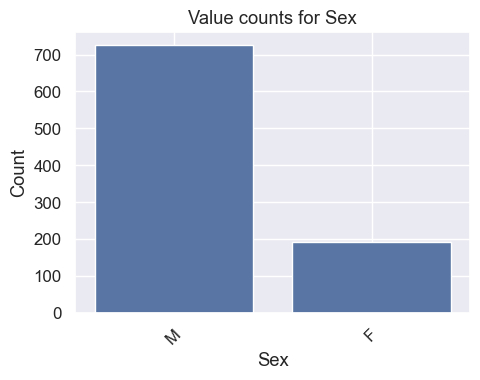

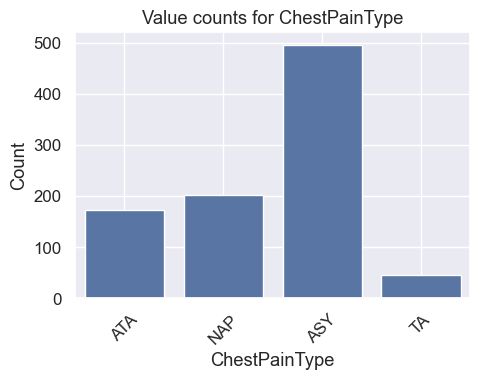

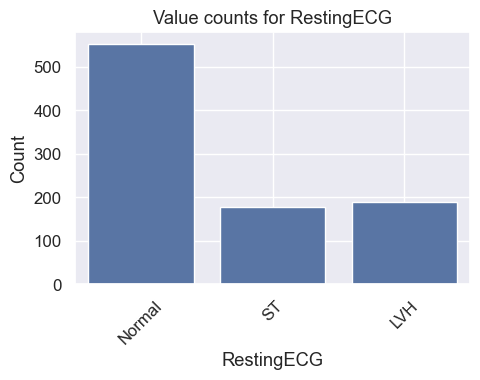

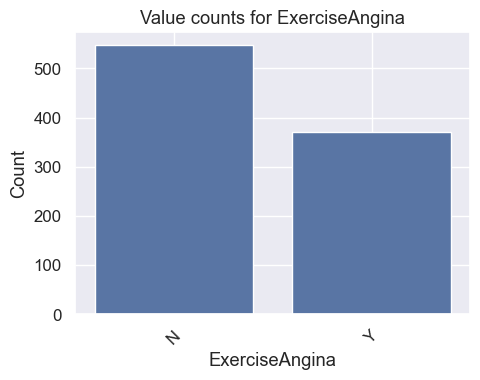

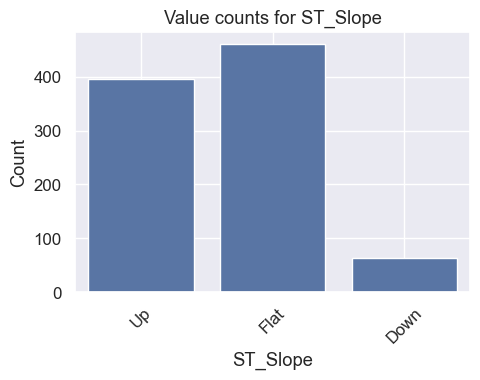

In [108]:
# Same shit using seaborn
for c in range(len(categorical_cols)):
    plt.figure(figsize = (5,4))
    plt.title(f"Value counts for {categorical_cols[c]}")
    sns.countplot(x=df[categorical_cols[c]])
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

##### Relationship between features and target

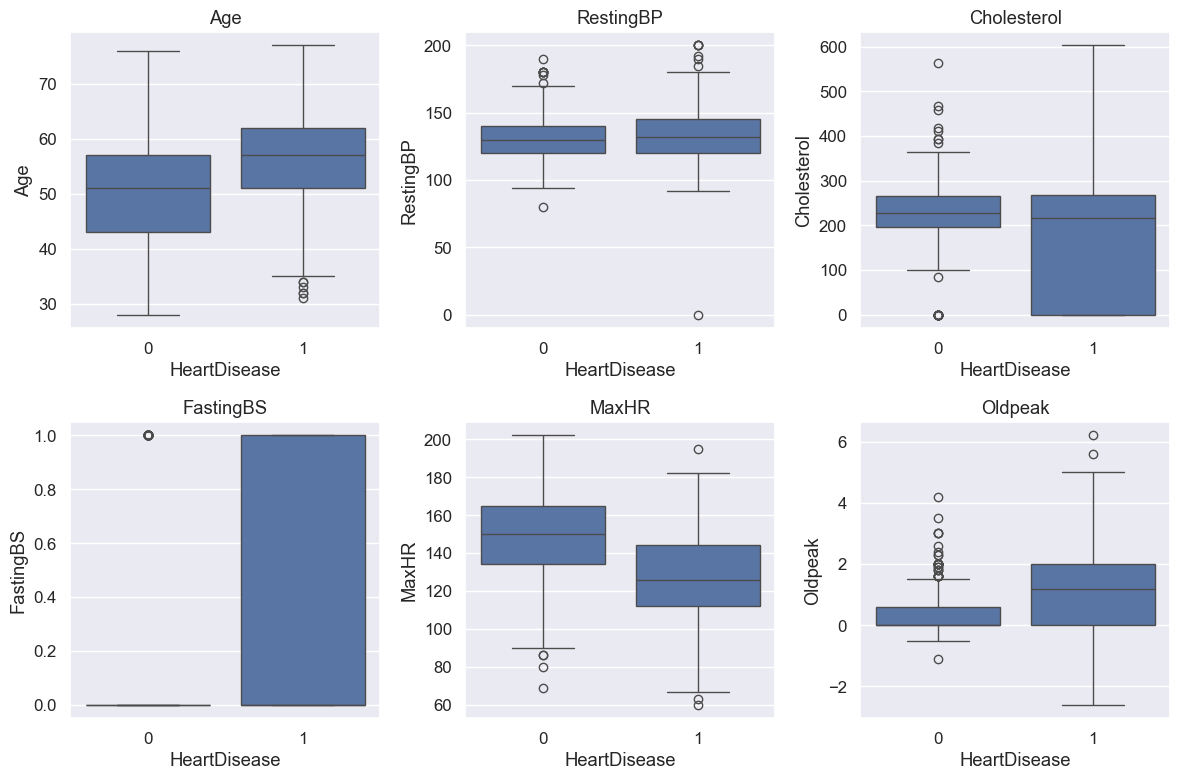

In [109]:
# Boxplot of numeric features split by Heart Disease
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x = df[target_cols],y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

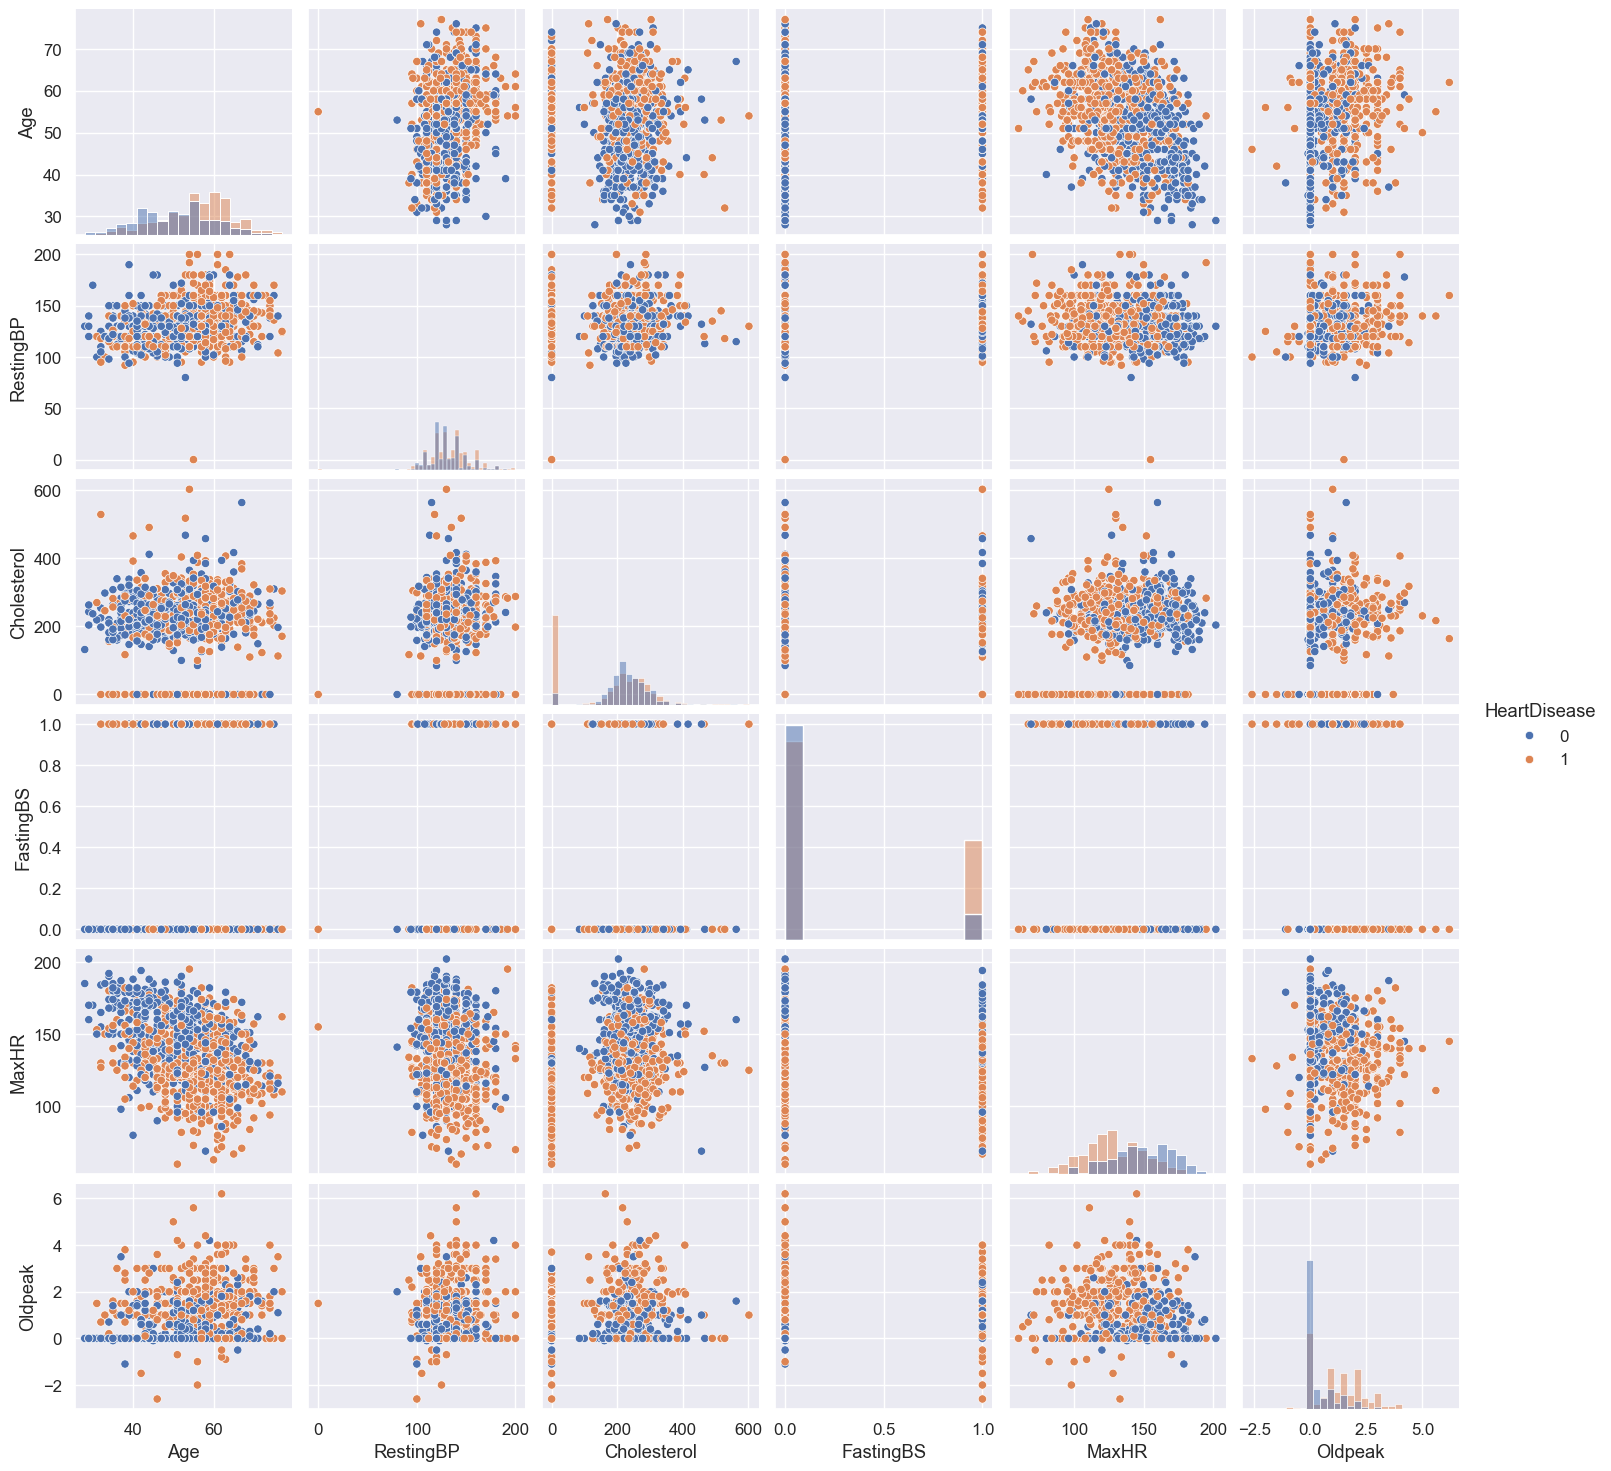

In [134]:
# Pairplot for a subset of features
sns.pairplot(data=df[numeric_cols+[target_cols]],diag_kind='hist',hue='HeartDisease')
plt.show()

##### Correlation matrix & Heatmap

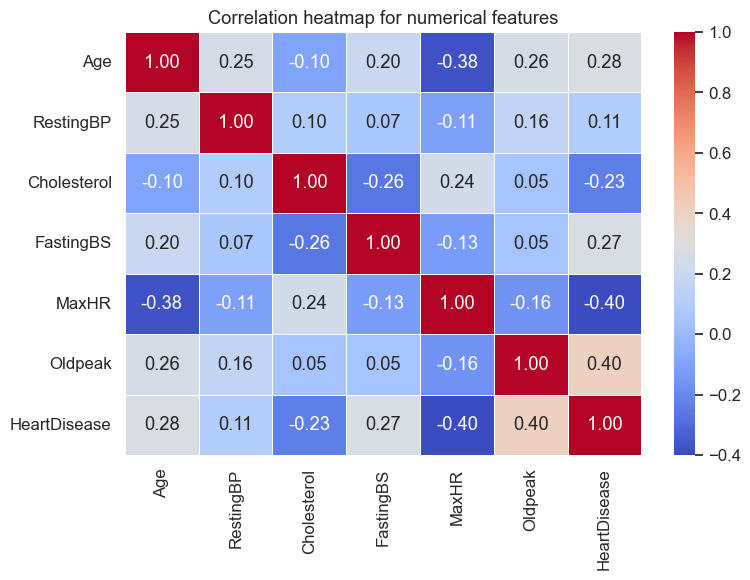

In [140]:
corr_mat = df[numeric_cols+[target_cols]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=corr_mat,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.title('Correlation heatmap for numerical features')
plt.tight_layout()
plt.show()

In [145]:
corr_mat[target_cols].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

##### Categorical features vs Target


Proportion of Heart Disease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


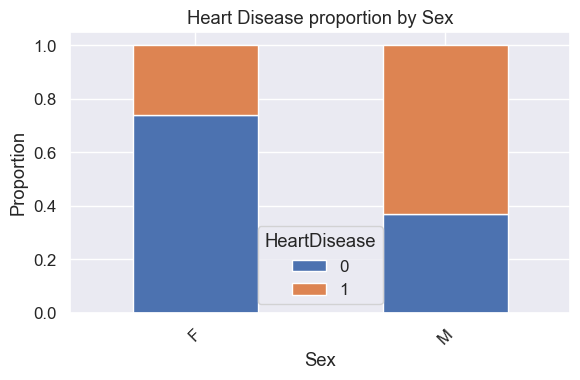


Proportion of Heart Disease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


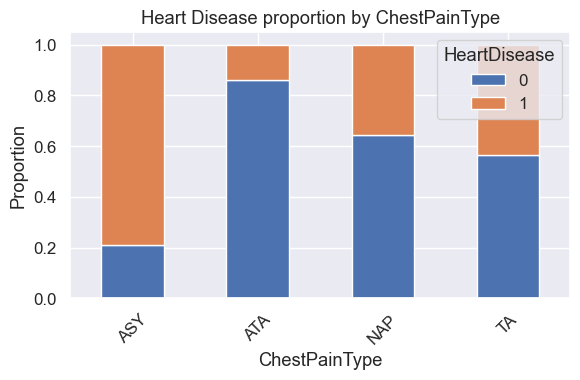


Proportion of Heart Disease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


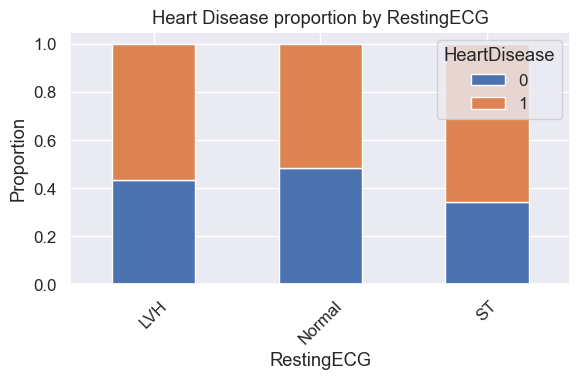


Proportion of Heart Disease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


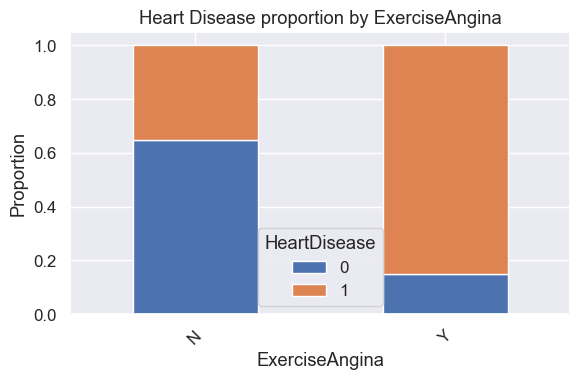


Proportion of Heart Disease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


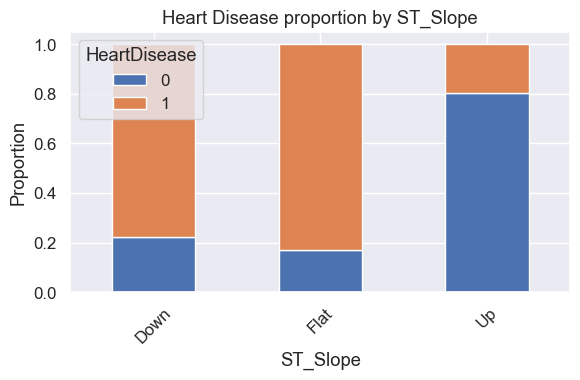

In [147]:
for c in categorical_cols:
    ct = pd.crosstab(df[c], df[target_cols], normalize='index')
    print(f"\nProportion of Heart Disease within {c}")
    display(ct)
    ct.plot(kind='bar',stacked=True,figsize=(6,4))
    plt.title(f"Heart Disease proportion by {c}")
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()